# Results

In [1]:
# Import CSV from 
# results/grayscale_sun/per_image_metrics.csv
# results/canny_sun/per_image_metrics.csv
# results/LoG_sun/per_image_metrics.csv
# results/random_sun/per_image_metrics.csv

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def load_csv(file_path):
    """
    Load CSV file and return DataFrame.
    """
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        return df
    else:
        print(f"File {file_path} does not exist.")
        return None
    
    # metric,mean,std
def plot_metrics(df, title):
    """
    Plot metrics from DataFrame.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x='metric', y='mean', data=df, yerr=df['std'], capsize=.2)
    plt.title(title)
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:
# import the 4 csv files
grayscale_df = load_csv('../results/grayscale_sun/summary_metrics.csv')
canny_df = load_csv('../results/canny_sun/summary_metrics.csv')
log_df = load_csv('../results/LoG_sun/summary_metrics.csv')
random_df = load_csv('../results/random_sun/summary_metrics.csv')

# Combine the dataframes
combined_df = pd.concat([grayscale_df, canny_df, log_df, random_df], keys=['Grayscale', 'Canny', 'LoG', 'Random'])
# Reset index
combined_df.reset_index(level=0, inplace=True)
combined_df.rename(columns={'level_0': 'Method'}, inplace=True)

combined_df

,Method,metric,mean,std
0,Grayscale,mse,0.033616,0.014518
1,Grayscale,ssim,0.565286,0.136577
2,Grayscale,vgg_perceptual,1.507009,0.076151
3,Grayscale,lpips,0.606434,0.047426
4,Grayscale,infer_time_s,0.004366,0.004904
0,Canny,mse,0.063526,0.026841
1,Canny,ssim,0.631339,0.149820
2,Canny,vgg_perceptual,1.496071,0.097293
3,Canny,lpips,0.616644,0.058158
4,Canny,infer_time_s,0.005183,0.006186


/scratch-local/mappel.11827078/ipykernel_486115/235671890.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dfm['Method'], rotation=45, ha='right')


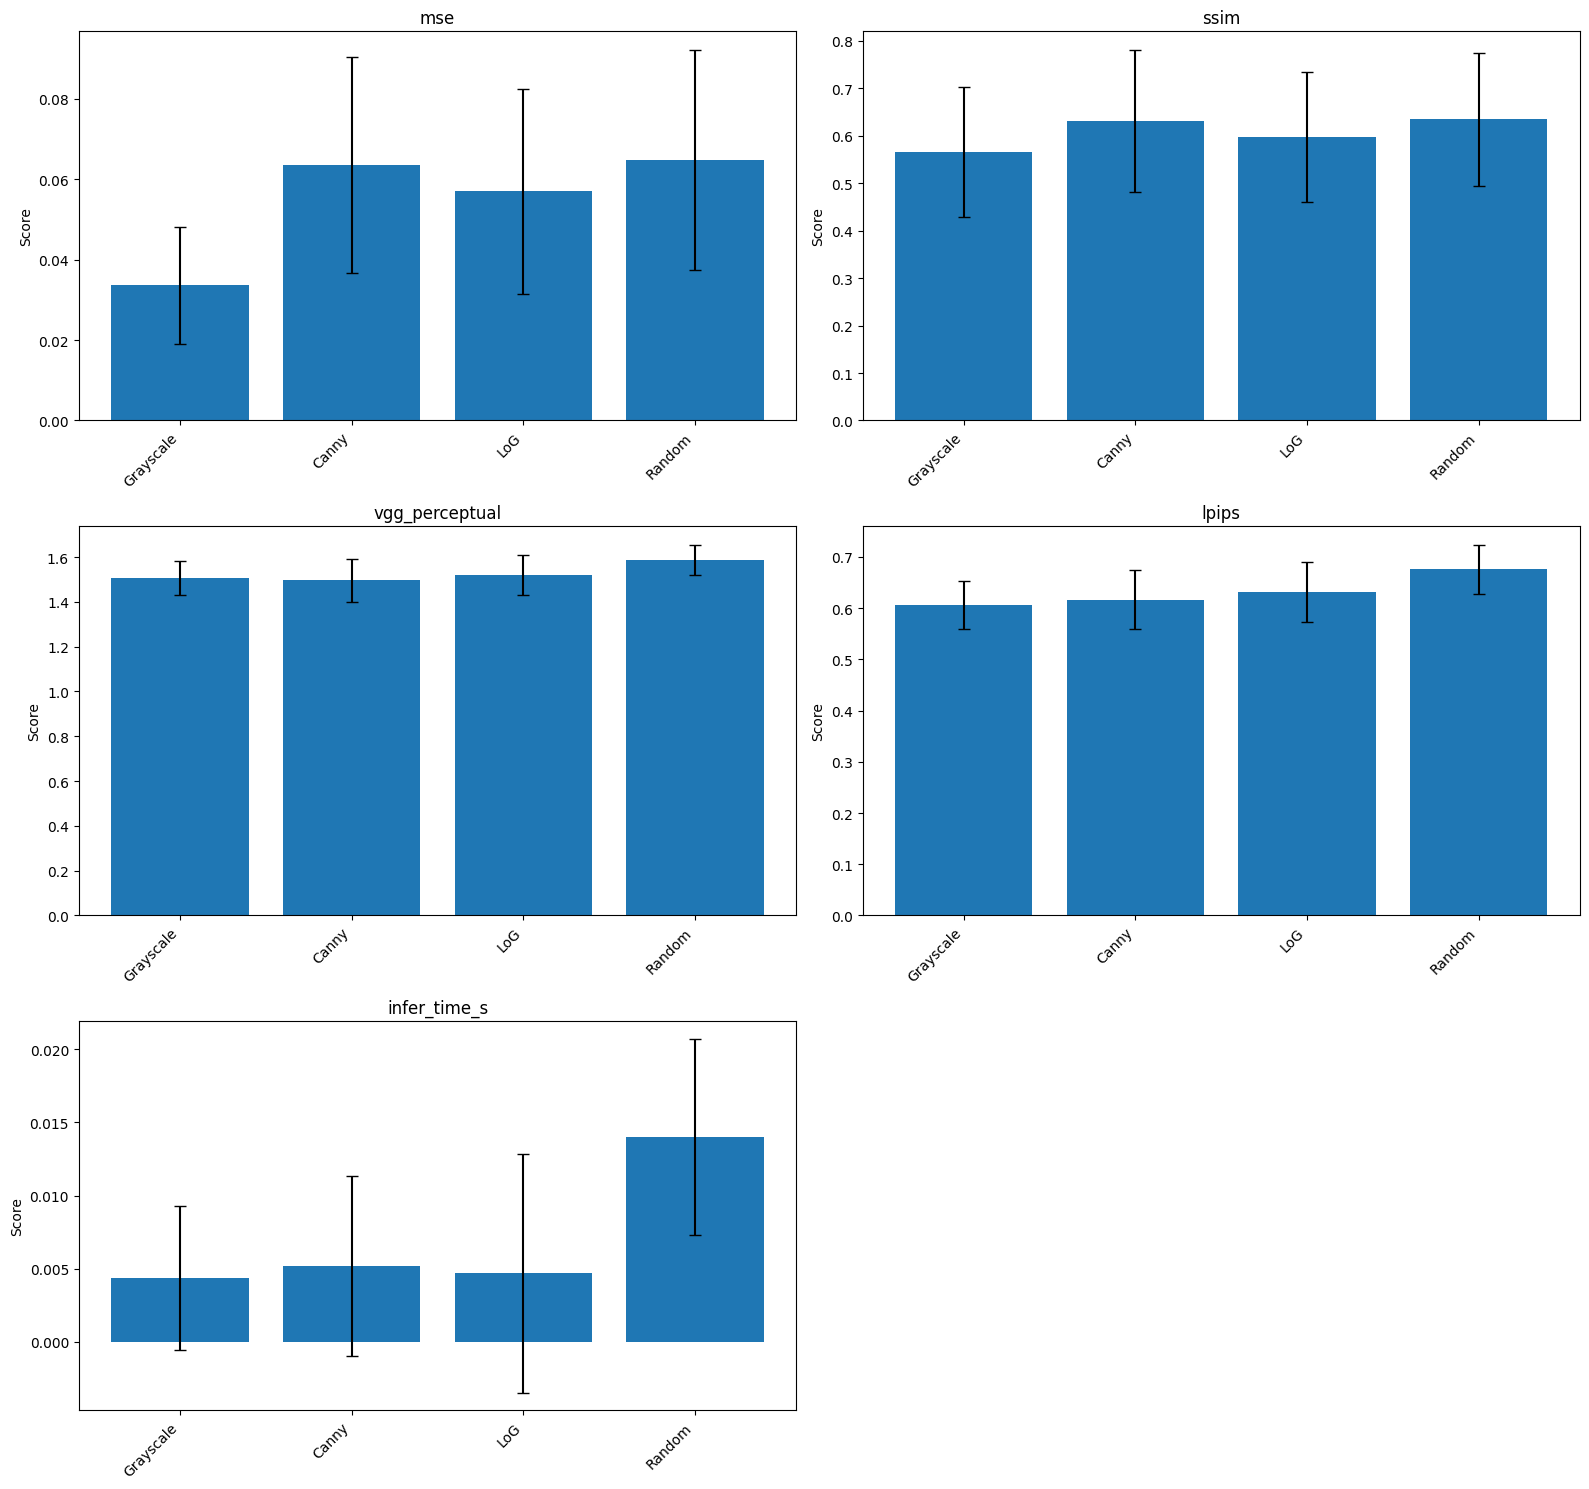

In [16]:
metrics = combined_df['metric'].unique()
n = len(metrics)
cols = 2
rows = (n + 1)//cols

fig, axes = plt.subplots(rows, cols, figsize=(8*cols, 5*rows))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    dfm = combined_df[combined_df['metric'] == metric]
    ax.bar(dfm['Method'], dfm['mean'], 
           yerr=dfm['std'], 
           capsize=4)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xticklabels(dfm['Method'], rotation=45, ha='right')
    
# hide any unused axes
for ax in axes[len(metrics):]:
    ax.axis('off')

plt.tight_layout()
plt.show()
